In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from docplex.mp.model import Model

In [5]:
data = pd.Series([3,6,2,4,6,8,4,4,3,2,5])
data

0     3
1     6
2     2
3     4
4     6
5     8
6     4
7     4
8     3
9     2
10    5
dtype: int64

In [115]:
file_2[0][3]

30

In [6]:
# def ModeloBPP(dataframe, indices_nodos, str_nombre_modelo):
#     m = Model(name = str_nombre_modelo)
#     x = {(i,j): m.binary_var(name='x_{}_{}'.format(i,j)) for i in indices_nodos for j in indices_nodos if i!=j}

In [13]:
from utils.data_utils import load_dataset
from funciones_personalizadas import modified_plot_vehicle_routes
file = load_dataset('CPLEX_VRP_20_EXP1_primero_seed123.pkl')
file_2 = load_dataset('VRP_20_EXP1_primero_seed123.pkl')

In [41]:
len(file_2[3][1])

20

No handles with labels found to put in legend.


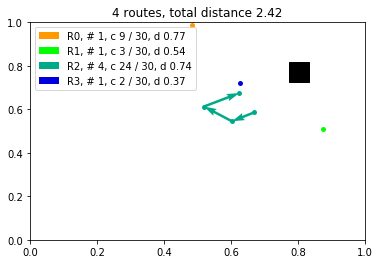

In [30]:
idx=1
fig, ax1=plt.subplots(1,1)
modified_plot_vehicle_routes(file_2[idx], file[0][idx][1], ax1=ax1)

In [42]:
# Cargamos las librerías necesarias:
from funciones_personalizadas import generar_un_grafo_personalizable, generar_vrp_personalizable
from funciones_personalizadas import plot_muestra_varios_grafos, crear_y_guardar_datasets
from funciones_personalizadas import modified_plot_vehicle_routes

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.data_utils import save_dataset
from utils.data_utils import load_dataset

import networkx as nx
from programacion_lineal.funciones_docplex import GenerarTablaDistancias, AdaptarDataFrameLocalidades
from programacion_lineal.funciones_docplex import CrearCVRPOptimizarObtenerViajesPlotearGrafo

In [229]:

def ResolverLoteConCplex(all_datasets_list, str_nombre_depot, num_rutas, capacidad_vehiculo, limite_mins=9999999,
                         limite_porc_optim=None, url=None, key=None, log_output=True):
    contador = 1
    acumulador_soluciones = []
    for i in all_datasets_list:
        print("############## \n GRAFO {}/{} \n##############".format(contador, len(all_datasets_list)))
        # Adaptar dataframe:
        df_localidades = AdaptarDataFrameLocalidades(i)
        matriz_distancias = GenerarTablaDistancias(df_localidades, df_localidades.index)
        # Resolver modelo lineal:
        modelo_cplex, viajes_cplex, grafo_cplex = CrearCVRPOptimizarObtenerViajesPlotearGrafo(
            dataframe_distancias=matriz_distancias, etiquetas_nodos=list(map(str,df_localidades.index)), 
            str_nombre_depot=str_nombre_depot, num_rutas=num_rutas, capacidad_vehiculo=capacidad_vehiculo, 
            serie_demandas_nodos=df_localidades['demanda'], str_nombre_modelo='cvrp_cplex',
            limite_mins = limite_mins, limite_porc_optim=limite_porc_optim, url=url, key=key, log_output=log_output
        )
        # Obtener objetivo y porcentaje de optimalidad:
        valor_obj = modelo_cplex.objective_value
#         porc_optim = modelo_cplex.get_cplex().solution.MIP.get_mip_relative_gap()
#         best_solution = modelo_cplex.get_cplex().solution.MIP.get_best_objective()
        str_soluc = str(model.get_solve_details())
        str_soluc = str_soluc[str_soluc.find('gap'):]
        porc_optim = float(str_soluc[str_soluc.find('=')+2:str_soluc.find('%')])/100
        # Obtener rutas generadas:
        secuencia_rutas = []
        for j in np.argwhere(viajes_cplex.iloc[:,0]).ravel():
            secuencia_rutas.extend(list(nx.all_simple_paths(grafo_cplex, '0', str(j)))[0])
        secuencia_rutas = list(map(int, secuencia_rutas[1:] + ['0']))
        # Obtener tiempo de resolución en segundos:
        tiempo_ejec = modelo_cplex.solve_details.time
        # Se junta todo como una tupla por instancia
        acumulador_soluciones.append(tuple([valor_obj, secuencia_rutas, tiempo_ejec, porc_optim])) # el 'porc_optim' es un extra! OJO
        contador += 1
    # Damos una forma similar a los archivos obtenidos mediante el modelo neuronal:
    acumulador_soluciones = tuple([acumulador_soluciones, 1024])
    return acumulador_soluciones, modelo_cplex

In [49]:
# Generando varios datasets:
# Ahora se generan grafos y se graban en la computadora:

# EXPERIMENTO 1
crear_y_guardar_datasets(dataset_size=30, vrp_size=20, capacity=30, n_clusters=None, perc_clustered_points=0,
                         demands_distribution='integer_uniform', seed=123, datadir='datos_generados',
                         name='EXP1_primero', low=1, high=10)
crear_y_guardar_datasets(dataset_size=30, vrp_size=35, capacity=35, n_clusters=None, perc_clustered_points=0,
                         demands_distribution='integer_uniform', seed=124, datadir='datos_generados',
                         name='EXP1_segundo', low=1, high=10)
crear_y_guardar_datasets(dataset_size=30, vrp_size=50, capacity=40, n_clusters=None, perc_clustered_points=0,
                         demands_distribution='integer_uniform', seed=125, datadir='datos_generados',
                         name='EXP1_tercero', low=1, high=10)
crear_y_guardar_datasets(dataset_size=30, vrp_size=75, capacity=45, n_clusters=None, perc_clustered_points=0,
                         demands_distribution='integer_uniform', seed=126, datadir='datos_generados',
                         name='EXP1_cuarto', low=1, high=10)
crear_y_guardar_datasets(dataset_size=30, vrp_size=100, capacity=50, n_clusters=None, perc_clustered_points=0,
                         demands_distribution='integer_uniform', seed=127, datadir='datos_generados',
                         name='EXP1_quinto', low=1, high=10)
crear_y_guardar_datasets(dataset_size=30, vrp_size=150, capacity=60, n_clusters=None, perc_clustered_points=0,
                         demands_distribution='integer_uniform', seed=128, datadir='datos_generados',
                         name='EXP1_sexto', low=1, high=10)

# EXPERIMENTO 3: CLUSTERS
crear_y_guardar_datasets(dataset_size=30, vrp_size=20, capacity=30, n_clusters=2, perc_clustered_points=0.75,
                         demands_distribution='integer_uniform', seed=129, datadir='datos_generados',
                         name='EXP3_2_primero', low=1, high=10)
crear_y_guardar_datasets(dataset_size=30, vrp_size=35, capacity=35, n_clusters=2, perc_clustered_points=0.75,
                         demands_distribution='integer_uniform', seed=130, datadir='datos_generados',
                         name='EXP3_2_segundo', low=1, high=10)
crear_y_guardar_datasets(dataset_size=30, vrp_size=50, capacity=40, n_clusters=2, perc_clustered_points=0.75,
                         demands_distribution='integer_uniform', seed=131, datadir='datos_generados',
                         name='EXP3_2_tercero', low=1, high=10)
crear_y_guardar_datasets(dataset_size=30, vrp_size=75, capacity=45, n_clusters=2, perc_clustered_points=0.75,
                         demands_distribution='integer_uniform', seed=132, datadir='datos_generados',
                         name='EXP3_2_cuarto', low=1, high=10)
crear_y_guardar_datasets(dataset_size=30, vrp_size=100, capacity=50, n_clusters=2, perc_clustered_points=0.75,
                         demands_distribution='integer_uniform', seed=133, datadir='datos_generados',
                         name='EXP3_2_quinto', low=1, high=10)
crear_y_guardar_datasets(dataset_size=30, vrp_size=150, capacity=60, n_clusters=2, perc_clustered_points=0.75,
                         demands_distribution='integer_uniform', seed=134, datadir='datos_generados',
                         name='EXP3_2_sexto', low=1, high=10)

crear_y_guardar_datasets(dataset_size=30, vrp_size=20, capacity=30, n_clusters=3, perc_clustered_points=0.75,
                         demands_distribution='integer_uniform', seed=135, datadir='datos_generados',
                         name='EXP3_3_primero', low=1, high=10)
crear_y_guardar_datasets(dataset_size=30, vrp_size=35, capacity=35, n_clusters=3, perc_clustered_points=0.75,
                         demands_distribution='integer_uniform', seed=136, datadir='datos_generados',
                         name='EXP3_3_segundo', low=1, high=10)
crear_y_guardar_datasets(dataset_size=30, vrp_size=50, capacity=40, n_clusters=3, perc_clustered_points=0.75,
                         demands_distribution='integer_uniform', seed=137, datadir='datos_generados',
                         name='EXP3_3_tercero', low=1, high=10)
crear_y_guardar_datasets(dataset_size=30, vrp_size=75, capacity=45, n_clusters=3, perc_clustered_points=0.75,
                         demands_distribution='integer_uniform', seed=138, datadir='datos_generados',
                         name='EXP3_3_cuarto', low=1, high=10)
crear_y_guardar_datasets(dataset_size=30, vrp_size=100, capacity=50, n_clusters=3, perc_clustered_points=0.75,
                         demands_distribution='integer_uniform', seed=139, datadir='datos_generados',
                         name='EXP3_3_quinto', low=1, high=10)
crear_y_guardar_datasets(dataset_size=30, vrp_size=150, capacity=60, n_clusters=3, perc_clustered_points=0.75,
                         demands_distribution='integer_uniform', seed=140, datadir='datos_generados',
                         name='EXP3_3_sexto', low=1, high=10)

crear_y_guardar_datasets(dataset_size=30, vrp_size=20, capacity=30, n_clusters=4, perc_clustered_points=0.75,
                         demands_distribution='integer_uniform', seed=141, datadir='datos_generados',
                         name='EXP3_4_primero', low=1, high=10)
crear_y_guardar_datasets(dataset_size=30, vrp_size=35, capacity=35, n_clusters=4, perc_clustered_points=0.75,
                         demands_distribution='integer_uniform', seed=142, datadir='datos_generados',
                         name='EXP3_4_segundo', low=1, high=10)
crear_y_guardar_datasets(dataset_size=30, vrp_size=50, capacity=40, n_clusters=4, perc_clustered_points=0.75,
                         demands_distribution='integer_uniform', seed=143, datadir='datos_generados',
                         name='EXP3_4_tercero', low=1, high=10)
crear_y_guardar_datasets(dataset_size=30, vrp_size=75, capacity=45, n_clusters=4, perc_clustered_points=0.75,
                         demands_distribution='integer_uniform', seed=144, datadir='datos_generados',
                         name='EXP3_4_cuarto', low=1, high=10)
crear_y_guardar_datasets(dataset_size=30, vrp_size=100, capacity=50, n_clusters=4, perc_clustered_points=0.75,
                         demands_distribution='integer_uniform', seed=145, datadir='datos_generados',
                         name='EXP3_4_quinto', low=1, high=10)
crear_y_guardar_datasets(dataset_size=30, vrp_size=150, capacity=60, n_clusters=4, perc_clustered_points=0.75,
                         demands_distribution='integer_uniform', seed=146, datadir='datos_generados',
                         name='EXP3_4_sexto', low=1, high=10)

Grabando archivo datos_generados\VRP_20_EXP1_primero_seed123.pkl con 30 grafos
Listo!
Grabando archivo datos_generados\VRP_35_EXP1_segundo_seed124.pkl con 30 grafos
Listo!
Grabando archivo datos_generados\VRP_50_EXP1_tercero_seed125.pkl con 30 grafos
Listo!
Grabando archivo datos_generados\VRP_75_EXP1_cuarto_seed126.pkl con 30 grafos
Listo!
Grabando archivo datos_generados\VRP_100_EXP1_quinto_seed127.pkl con 30 grafos
Listo!
Grabando archivo datos_generados\VRP_150_EXP1_sexto_seed128.pkl con 30 grafos
Listo!
Grabando archivo datos_generados\VRP_20_EXP3_2_primero_seed129.pkl con 30 grafos
Listo!
Grabando archivo datos_generados\VRP_35_EXP3_2_segundo_seed130.pkl con 30 grafos
Listo!
Grabando archivo datos_generados\VRP_50_EXP3_2_tercero_seed131.pkl con 30 grafos
Listo!
Grabando archivo datos_generados\VRP_75_EXP3_2_cuarto_seed132.pkl con 30 grafos
Listo!
Grabando archivo datos_generados\VRP_100_EXP3_2_quinto_seed133.pkl con 30 grafos
Listo!
Grabando archivo datos_generados\VRP_150_EXP3_2

In [50]:
# Listo:
lista_files = [
    'datos_generados/VRP_20_EXP1_primero_seed123.pkl'
]

 ################################## RESOLVIENDO  datos_generados/VRP_20_EXP1_primero_seed123.pkl  ##################################
############## 
 GRAFO 1/30 
##############
========================= CREANDO MODELO =========================
Model: cvrp_cplex
 - number of variables: 440
   - binary=420, integer=0, continuous=20
 - number of constraints: 424
   - linear=424
 - parameters: defaults
None
======================= OPTIMIZANDO MODELO =======================
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               0.59999999999999998
Tried aggregator 1 time.
MIP Presolve eliminated 2 rows and 0 columns.
Reduced MIP has 422 rows, 440 columns, and 1980 nonzeros.
Reduced MIP has 420 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.33 ticks)
Found incumbent of value 10.590091 after 0.02 sec. (4.52 ticks)
Probing time = 0.00 sec. (1.84 ticks)
Tried aggregator 1 time.
Reduced MIP has 422 rows, 440 columns, and 

C:\Users\huama\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


############## 
 GRAFO 2/30 
##############
========================= CREANDO MODELO =========================
Model: cvrp_cplex
 - number of variables: 440
   - binary=420, integer=0, continuous=20
 - number of constraints: 424
   - linear=424
 - parameters: defaults
None
======================= OPTIMIZANDO MODELO =======================
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               0.59999999999999998
Tried aggregator 1 time.
Reduced MIP has 424 rows, 440 columns, and 2020 nonzeros.
Reduced MIP has 420 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.25 ticks)
Found incumbent of value 10.023587 after 0.02 sec. (4.59 ticks)
Probing time = 0.00 sec. (1.85 ticks)
Tried aggregator 1 time.
Reduced MIP has 424 rows, 440 columns, and 2020 nonzeros.
Reduced MIP has 420 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.55 ticks)
Probing time = 0.00 sec. (1.88 ticks)
Clique table member

20  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
==================== CREANDO GRAFO DE VIAJES =====================
############## 
 GRAFO 5/30 
##############
========================= CREANDO MODELO =========================
Model: cvrp_cplex
 - number of variables: 440
   - binary=420, integer=0, continuous=20
 - number of constraints: 424
   - linear=424
 - parameters: defaults
None
======================= OPTIMIZANDO MODELO =======================
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               0.59999999999999998
Tried aggregator 1 time.
Reduced MIP has 424 rows, 440 columns, and 2020 nonzeros.
Reduced MIP has 420 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.25 ticks)
Found incumbent of value 14.597475 after 0.00 sec. (4.43 ticks)
Probing time = 0.02 sec. (1.85 ticks)
Tried aggregator 1 time.
Reduced MIP has 424 rows, 440 columns, and 2020

20  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
==================== CREANDO GRAFO DE VIAJES =====================
############## 
 GRAFO 8/30 
##############
========================= CREANDO MODELO =========================
Model: cvrp_cplex
 - number of variables: 440
   - binary=420, integer=0, continuous=20
 - number of constraints: 424
   - linear=424
 - parameters: defaults
None
======================= OPTIMIZANDO MODELO =======================
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               0.59999999999999998
Tried aggregator 1 time.
Reduced MIP has 424 rows, 440 columns, and 2020 nonzeros.
Reduced MIP has 420 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.25 ticks)
Found incumbent of value 15.502089 after 0.01 sec. (4.44 ticks)
Probing time = 0.00 sec. (1.86 ticks)
Tried aggregator 1 time.
Reduced MIP has 424 rows, 440 columns, and 2020

20  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
==================== CREANDO GRAFO DE VIAJES =====================
############## 
 GRAFO 11/30 
##############
========================= CREANDO MODELO =========================
Model: cvrp_cplex
 - number of variables: 440
   - binary=420, integer=0, continuous=20
 - number of constraints: 424
   - linear=424
 - parameters: defaults
None
======================= OPTIMIZANDO MODELO =======================
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               0.59999999999999998
Tried aggregator 1 time.
MIP Presolve eliminated 2 rows and 0 columns.
Reduced MIP has 422 rows, 440 columns, and 1980 nonzeros.
Reduced MIP has 420 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.33 ticks)
Found incumbent of value 12.069874 after 0.02 sec. (4.51 ticks)
Probing time = 0.00 sec. (1.84 ticks)
Tried aggregator 1 time.


20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
==================== CREANDO GRAFO DE VIAJES =====================
############## 
 GRAFO 14/30 
##############
========================= CREANDO MODELO =========================
Model: cvrp_cplex
 - number of variables: 440
   - binary=420, integer=0, continuous=20
 - number of constraints: 424
   - linear=424
 - parameters: defaults
None
======================= OPTIMIZANDO MODELO =======================
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               0.59999999999999998
Tried aggregator 1 time.
MIP Presolve eliminated 2 rows and 0 columns.
Reduced MIP has 422 rows, 440 columns, and 1980 nonzeros.
Reduced MIP has 420 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.33 ticks)
Found incumbent of value 12.494943 after 0.00 sec. (4.62 ticks)
Probing time = 0.02 sec. (1.84 ticks)
Tried aggregator 1 time.


  u_18=30.000
  u_19=26.000
  u_20=16.000
=================== OBTENIENDO MATRIZ DE VIAJES ==================
      0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20
0   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
2   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
5   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
6   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7   0.0  0.0  0.0  0.0  0.0

20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
==================== CREANDO GRAFO DE VIAJES =====================
############## 
 GRAFO 18/30 
##############
========================= CREANDO MODELO =========================
Model: cvrp_cplex
 - number of variables: 440
   - binary=420, integer=0, continuous=20
 - number of constraints: 424
   - linear=424
 - parameters: defaults
None
======================= OPTIMIZANDO MODELO =======================
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               0.59999999999999998
Tried aggregator 1 time.
MIP Presolve eliminated 2 rows and 0 columns.
Reduced MIP has 422 rows, 440 columns, and 1980 nonzeros.
Reduced MIP has 420 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.33 ticks)
Found incumbent of value 14.768360 after 0.01 sec. (4.52 ticks)
Probing time = 0.00 sec. (1.84 ticks)
Tried aggregator 1 time.


20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
==================== CREANDO GRAFO DE VIAJES =====================
############## 
 GRAFO 21/30 
##############
========================= CREANDO MODELO =========================
Model: cvrp_cplex
 - number of variables: 440
   - binary=420, integer=0, continuous=20
 - number of constraints: 424
   - linear=424
 - parameters: defaults
None
======================= OPTIMIZANDO MODELO =======================
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               0.59999999999999998
Tried aggregator 1 time.
Reduced MIP has 424 rows, 440 columns, and 2020 nonzeros.
Reduced MIP has 420 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.25 ticks)
Found incumbent of value 15.261395 after 0.02 sec. (4.49 ticks)
Probing time = 0.00 sec. (1.85 ticks)
Tried aggregator 1 time.
Reduced MIP has 424 rows, 440 columns, and 202

=================== OBTENIENDO MATRIZ DE VIAJES ==================
      0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20
0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
5   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
6   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  

20  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
==================== CREANDO GRAFO DE VIAJES =====================
############## 
 GRAFO 25/30 
##############
========================= CREANDO MODELO =========================
Model: cvrp_cplex
 - number of variables: 440
   - binary=420, integer=0, continuous=20
 - number of constraints: 424
   - linear=424
 - parameters: defaults
None
======================= OPTIMIZANDO MODELO =======================
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               0.59999999999999998
Tried aggregator 1 time.
MIP Presolve eliminated 2 rows and 0 columns.
Reduced MIP has 422 rows, 440 columns, and 1980 nonzeros.
Reduced MIP has 420 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.33 ticks)
Found incumbent of value 12.337059 after 0.00 sec. (4.61 ticks)
Probing time = 0.02 sec. (1.84 ticks)
Tried aggregator 1 time.


  u_20=8.000
=================== OBTENIENDO MATRIZ DE VIAJES ==================
      0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20
0   0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
6   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
==================== CREANDO GRAFO DE VIAJES =====================
############## 
 GRAFO 29/30 
##############
========================= CREANDO MODELO =========================
Model: cvrp_cplex
 - number of variables: 440
   - binary=420, integer=0, continuous=20
 - number of constraints: 424
   - linear=424
 - parameters: defaults
None
======================= OPTIMIZANDO MODELO =======================
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               0.59999999999999998
Tried aggregator 1 time.
Reduced MIP has 424 rows, 440 columns, and 2020 nonzeros.
Reduced MIP has 420 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (1.25 ticks)
Found incumbent of value 11.296595 after 0.02 sec. (4.69 ticks)
Probing time = 0.00 sec. (1.85 ticks)
Tried aggregator 1 time.
Reduced MIP has 424 rows, 440 columns, and 202

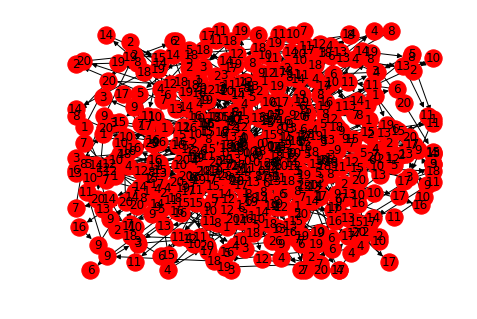

In [230]:
for i in lista_files:
    print(' ################################## RESOLVIENDO ',i,' ##################################')
    carga_actual = load_dataset(i)
    solucion_cplex,model = ResolverLoteConCplex(all_datasets_list=carga_actual, str_nombre_depot='0',
                                          num_rutas='auto_1.2_trivial', capacidad_vehiculo=carga_actual[0][3],
                                          limite_mins = 0.01, 
                                          url='https://api-oaas.docloud.ibmcloud.com/job_manager/rest/v1/',
                                          key='api_13844083-bb29-4ff8-9481-c659c1338785')

No handles with labels found to put in legend.


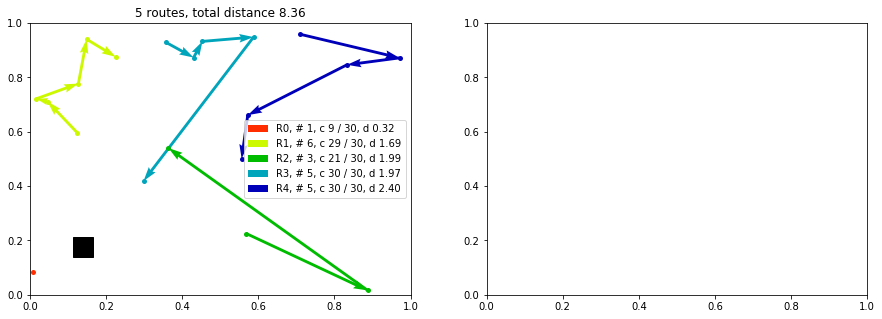

In [232]:
idx=7
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
modified_plot_vehicle_routes(file_2[idx], solucion_cplex[0][idx][1], ax1=ax1)